# EDA

---


### 1. libraries to use..


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as tl

### 2. I import the complete ETL dataset


In [6]:
df_steam=pd.read_csv('/home/mkm/programin/Steam_recommendation_model/Datasets/Data_Processed/Steam_For_Eda.csv')

#### 2.1 To make sure there are no nulls one last time, I remove them from the dataset.


In [7]:
df_steam.dropna(inplace=True)

## 3. I am going to analyze the most important distribution of the variables.


### Most Common Publishers


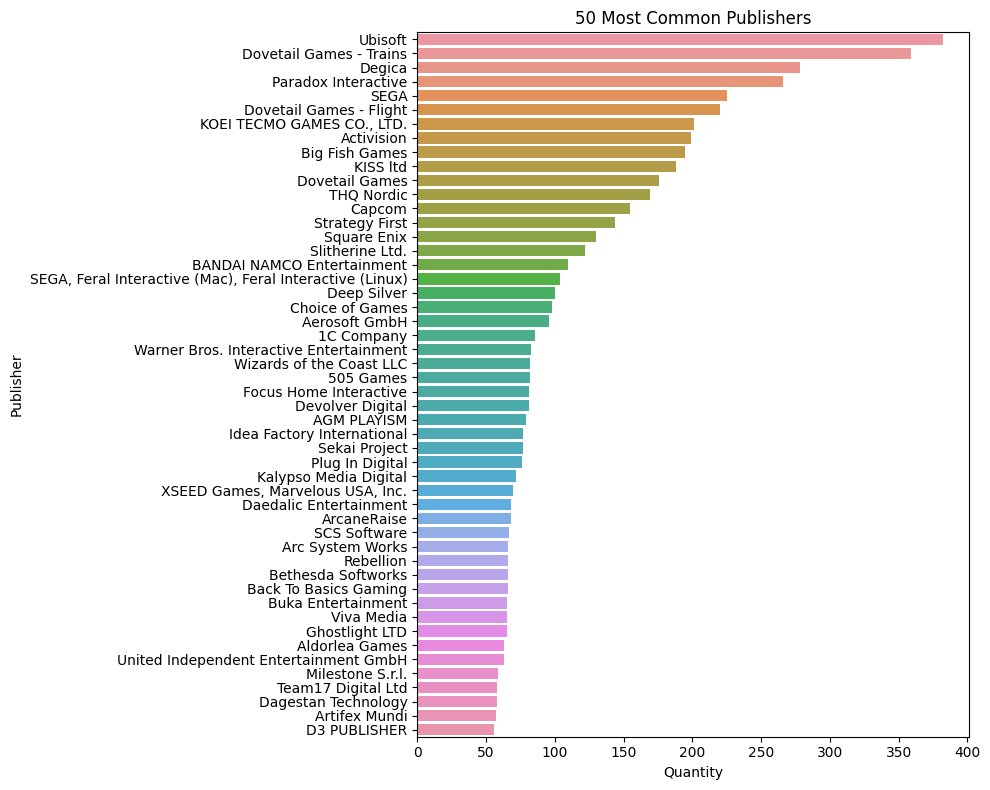

In [9]:
# Get the 50 most common values in the "publisher" column
top_publishers = df_steam["publisher"].value_counts().nlargest(50)

# We convert the Series with the 50 most common values back into a DataFrame
df_top_50 = top_publishers.reset_index()
df_top_50.columns = ["publisher", "count"]

# Adjust the size of the figure to make it bigger
plt.figure(figsize=(10, 8))

# We use Seaborn to plot the horizontal bar chart with the 50 most common "publisher" values
sns.barplot(x="count", y="publisher", data=df_top_50, orient="h")
plt.title("50 Most Common Publishers")
plt.xlabel("Quantity")
plt.ylabel("Publisher")

# Adjust the space between the bars vertically
plt.tight_layout()

plt.show()

- It can be seen how 4 companies stand out above all, Ubisoft, Dovetai, Delgica and Paradox interactive. Where a distribution follows, in general, uniform.


### Most Common Genres


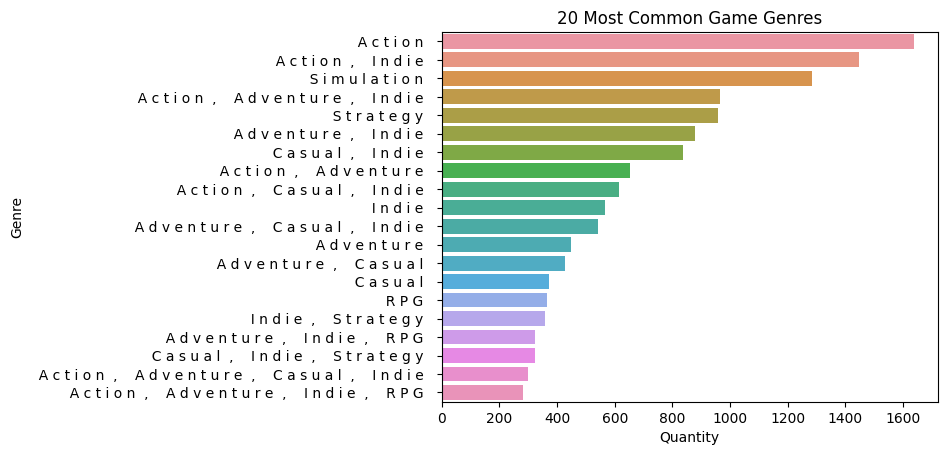

In [10]:
# Convert the list of sorts to individual rows and count the occurrences of each sort
genres_counts = df_steam["genres"].explode().value_counts()

# Get the 20 most common genres
top_genres = genres_counts.nlargest(20)

# We convert the Series with the 20 most common values back into a DataFrame
df_top_20 = top_genres.reset_index()
df_top_20.columns = ["genre", "count"]


# We apply the function to the "genre" column to obtain the concatenated genres without commas, brackets or quotes
df_top_20["genre"] = df_top_20["genre"].apply(tl.join_genres)

# We use Seaborn to plot the horizontal bar chart with the 20 most common genres
sns.barplot(x="count", y="genre", data=df_top_20, orient="h")
plt.title("20 Most Common Game Genres")
plt.xlabel("Quantity")
plt.ylabel("Genre")
plt.show()

- It can be inferred that 40% of the games on the platform are of the Action, Action, Indie and Action, adventure, Indie genres. Therefore, it is expected that this type of games, in general, will be cheaper due to its high offer. It will be a factor to evaluate in our model


### Records per year


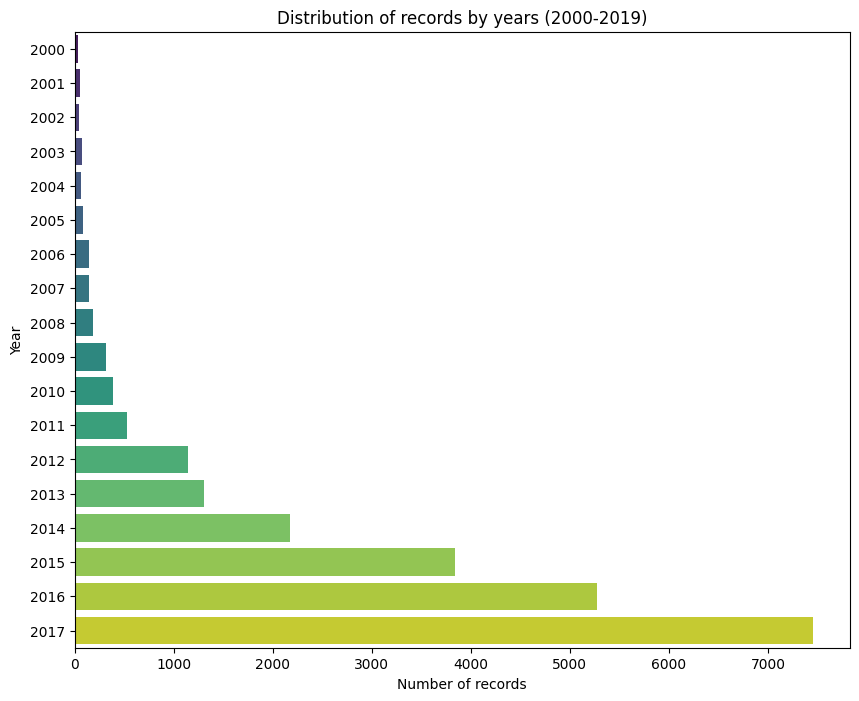

In [11]:
# Create a list with the years from 2000 to 2019
years = list(range(2000, 2018))

# Adjust the size of the figure to display all years horizontally
plt.figure(figsize=(10, 8))

# Use Seaborn to plot the bar graph over the years
sns.countplot(y="year", data=df_steam, palette="viridis", order=years)
plt.title("Distribution of records by years (2000-2019)")
plt.xlabel("Number of records")
plt.ylabel("Year")
plt.show()

- A steady increasing increase of about a thousand new games each year is observed


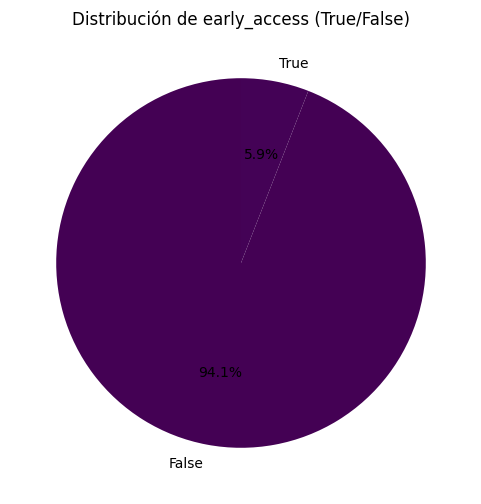

In [12]:
# Contar la cantidad de ocurrencias de cada valor en la columna "early_access"
count_data = df_steam["early_access"].value_counts()

# Utilizar Matplotlib para trazar el gráfico de torta con los valores
plt.figure(figsize=(6, 6))
plt.pie(count_data, labels=count_data.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.viridis.colors)
plt.title("Distribución de early_access (True/False)")
plt.show()

- It looks like there are very few games with early access, this is because very few game developer studios have the trust of the public.


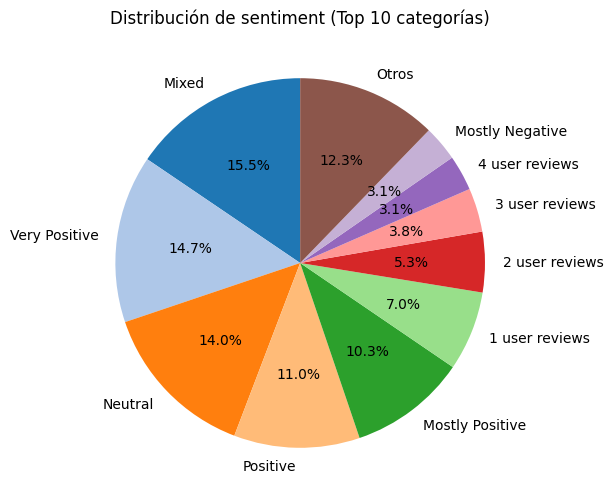

In [13]:
# Contar la cantidad de ocurrencias de cada valor en la columna "sentiment"
count_data = df_steam["sentiment"].value_counts()

# Limitar el número de categorías a 10 y agrupar el resto bajo la etiqueta "Otros"
top_categories = 10
top_counts = count_data[:top_categories]
other_count = count_data[top_categories:].sum()

# Crear un nuevo diccionario con las categorías limitadas y "Otros"
limited_data_dict = top_counts.to_dict()
limited_data_dict["Otros"] = other_count

# Crear una nueva Serie con el diccionario
limited_data = pd.Series(limited_data_dict)

# Utilizar Matplotlib para trazar el gráfico de torta con los valores limitados
plt.figure(figsize=(6, 6))

# Definir la paleta de colores personalizada
colors = plt.cm.tab20.colors[:len(limited_data)]

plt.pie(limited_data, labels=limited_data.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Distribución de sentiment (Top 10 categorías)")
plt.show()

- It is observed how sentiment has a very even distribution, the category others are 'N' users that are omitted due to space issues


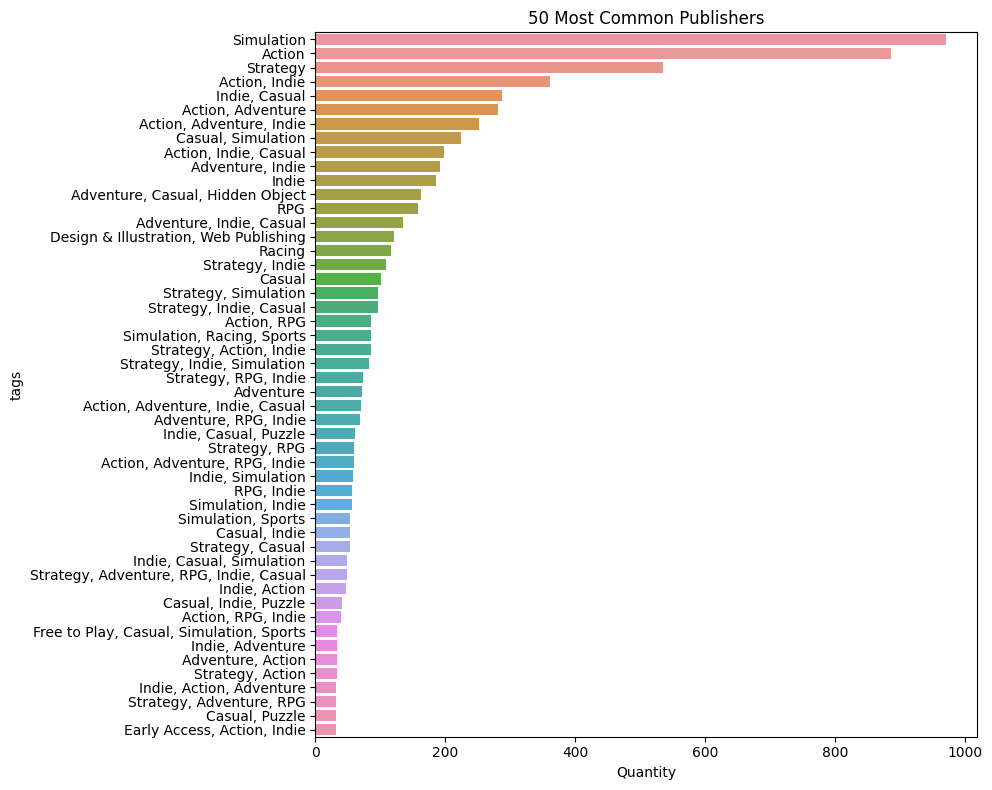

In [ ]:
# Get the 50 most common values in the "publisher" column
top_publishers = df_steam["tags"].value_counts().nlargest(50)

# We convert the Series with the 50 most common values back into a DataFrame
df_top_50 = top_publishers.reset_index()
df_top_50.columns = ["tags", "count"]

# Adjust the size of the figure to make it bigger
plt.figure(figsize=(10, 8))

# We use Seaborn to plot the horizontal bar chart with the 50 most common "publisher" values
sns.barplot(x="count", y="tags", data=df_top_50, orient="h")
plt.title("50 Most Common tags")
plt.xlabel("Quantity")
plt.ylabel("tags")

# Adjust the space between the bars vertically
plt.tight_layout()

plt.show()

/tmp/ipykernel_15883/428219798.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=top_50_genres.values, y=top_50_genres.index, ci=None, palette='viridis')


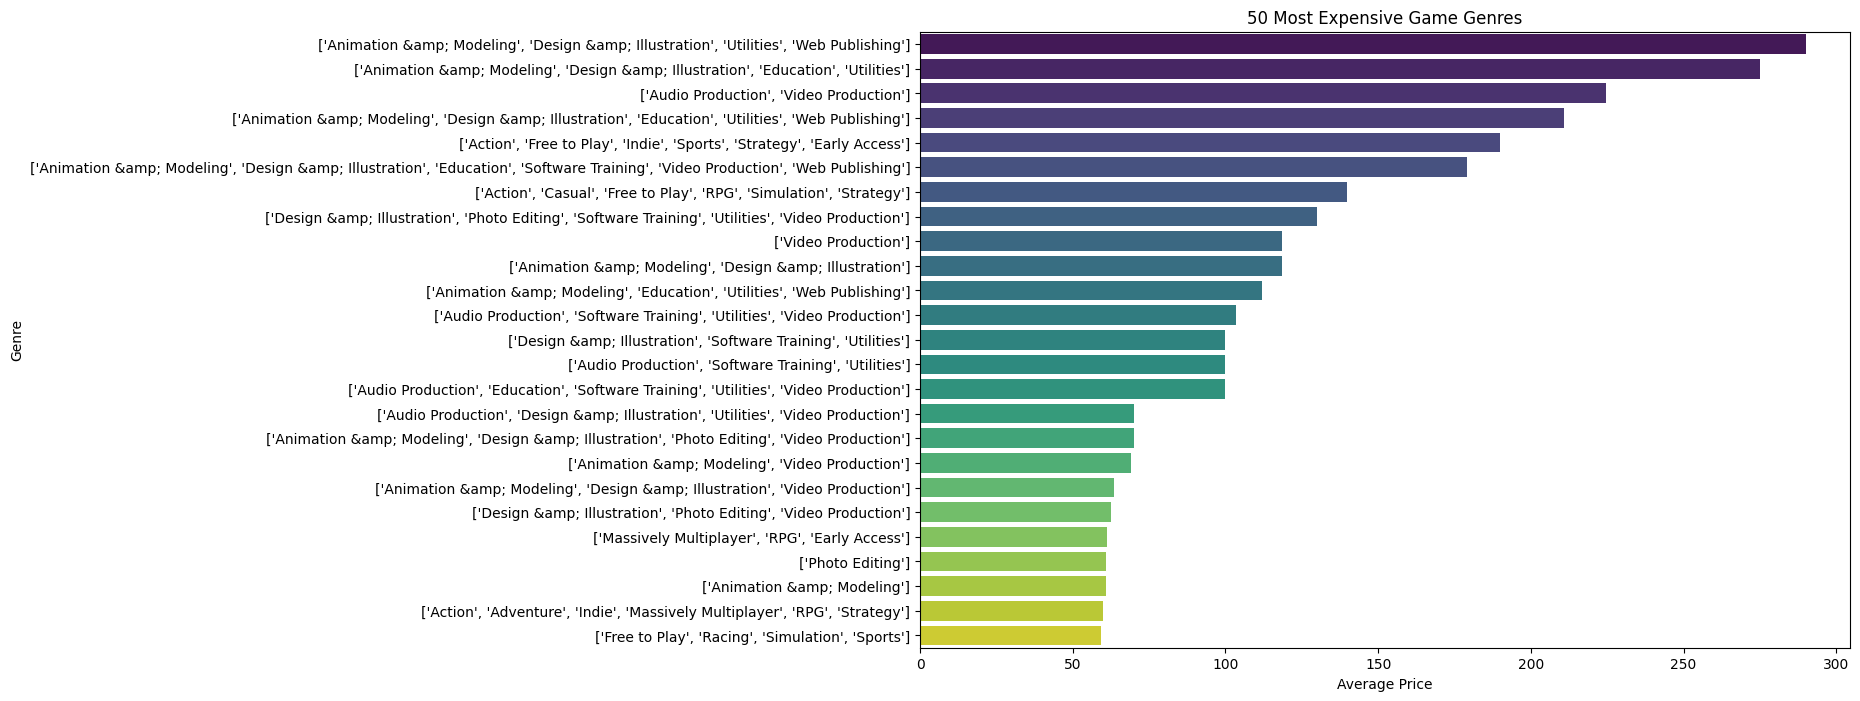

In [16]:
# Group by genre and calculate the average price for each
average_prices = df_steam.groupby('genres')['price'].mean().sort_values(ascending=False)

# Get only the first 50 most expensive genres
top_50_genres = average_prices.head(25)

# Adjust the size of the figure to make it bigger
plt.figure(figsize=(12, 8))

# Use Seaborn to plot the horizontal bar chart
sns.barplot(x=top_50_genres.values, y=top_50_genres.index, ci=None, palette='viridis')

# Tags and titles
plt.xlabel('Average Price')
plt.ylabel('Genre')
plt.title('50 Most Expensive Game Genres')

plt.show()

/tmp/ipykernel_15883/546377898.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price', y='publisher', data=publisher_prices_sorted, ci=None, palette='viridis')


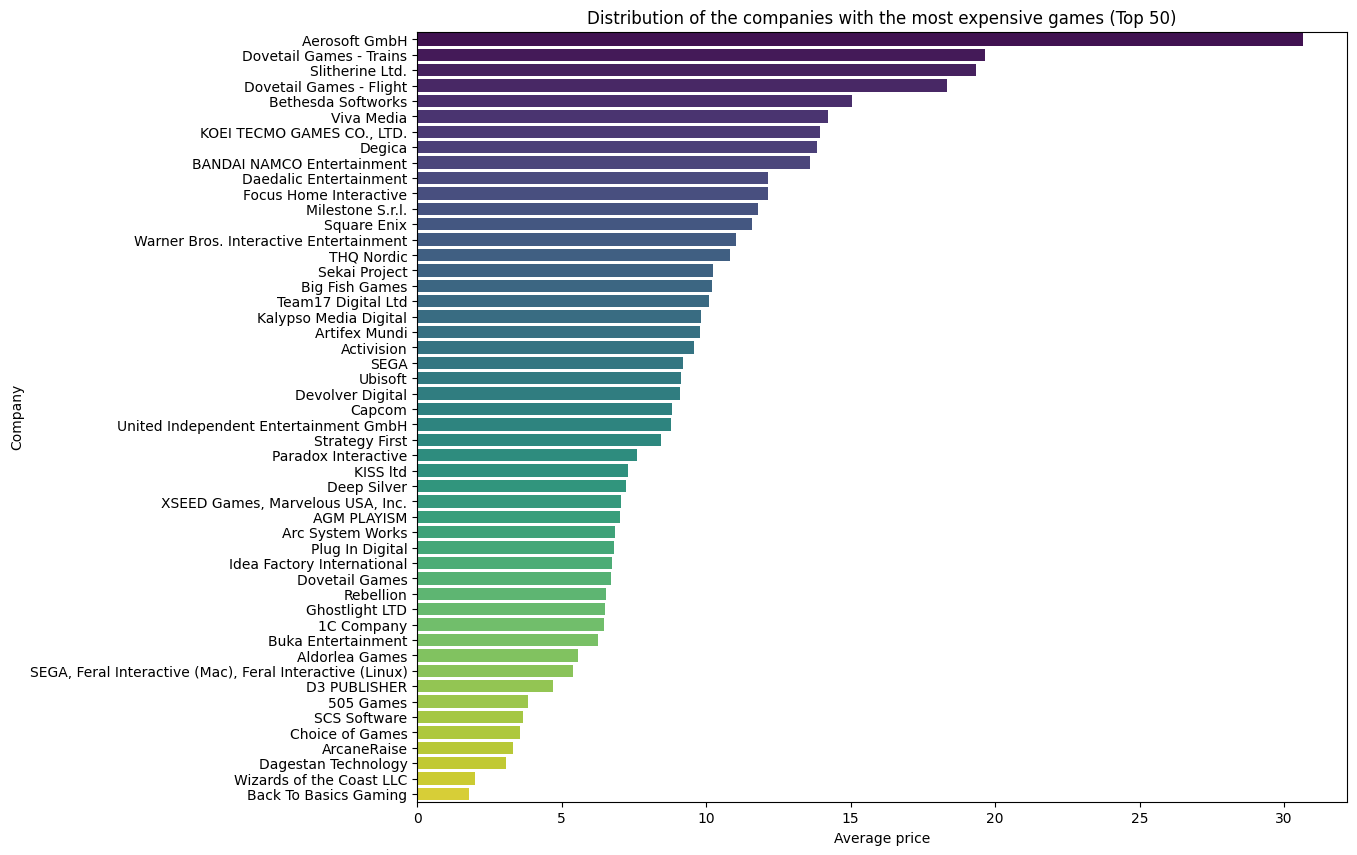

In [17]:
# Get the 50 companies with the most common games
top_50_publishers = df_steam["publisher"].value_counts().nlargest(50).index

# Filter the original DataFrame with only the selected companies
df_top_publishers = df_steam[df_steam["publisher"].isin(top_50_publishers)]

# Calculate the average price of games for each company
publisher_prices = df_top_publishers.groupby('publisher')['price'].mean().reset_index()

# Sort the DataFrame by price in descending order
publisher_prices_sorted = publisher_prices.sort_values(by='price', ascending=False)

# Adjust the size of the figure to make it bigger
plt.figure(figsize=(12, 10))

# Use Seaborn to plot the horizontal bar chart
sns.barplot(x='price', y='publisher', data=publisher_prices_sorted, ci=None, palette='viridis')

# Tags and titles
plt.xlabel('Average price')
plt.ylabel('Company')
plt.title('Distribution of the companies with the most expensive games (Top 50)')

plt.show()

In [18]:
# Suppose you already have the DataFrame df_steam with the dataset information you provided

# Filter the DataFrame to get only the records from publisher "Publisher XYZ"
publisher_name = "Aerosoft GmbH"
publisher_df = df_steam[df_steam['publisher'] == publisher_name]

# Check if the publisher has records in the DataFrame
if not publisher_df.empty:
     # Get the most common genre that the publisher produces
     most_common_genre = publisher_df['genres'].str.split(', ').explode().value_counts().idxmax()

     # print the result
     print(f"Publisher '{publisher_name}' mainly produces games in the genre '{most_common_genre}'.")
else:
     print(f"No records found for publisher '{publisher_name}'.")

Publisher 'Aerosoft GmbH' mainly produces games in the genre '['Simulation']'.


- It is appreciated how 1 company stands out above the others, 'Aerosoft GmbH', where the others do not stand out too much. In addition, the genre most produced by this company is Simulation, therefore our model is important.
